# Natural Language Processing

- 자연어(컴퓨터 프로그래밍 언어가 아닌 인간이 쓰는 언어)를 다루는 분야로 문서요약, 감성분석, 질의응답, 
  문장생성을 아우른다.
- 그런데 어떻게 컴퓨터가 언어를 이해하지? 
    - 컴퓨터는 언어를 있는 그대로 이해하는 것이 아니라 `숫자`로 계산한다.
    - 우리의 일상언어를 숫자로 표햔하는 것을 `임베딩`(embedding)이라 한다.
    - 사과(1), 포도(2), 학교(3)과 같이 언어에 무작위하게 숫자를 붙이는 방법에서 유사한 단어에 유사한 숫자가 부여도 되도록, 
      유사한 문장을 유사한 숫자로 표현되도록 하는 방향으로 발전하고 있다.
    - 언어처리의 가장 중요한 개념이 바로 이 임베딩이다. 서로 다른 모델은 서로 다른 임베딩 방법을 가지고 있다.

1. 단어 빈도로 나타내자
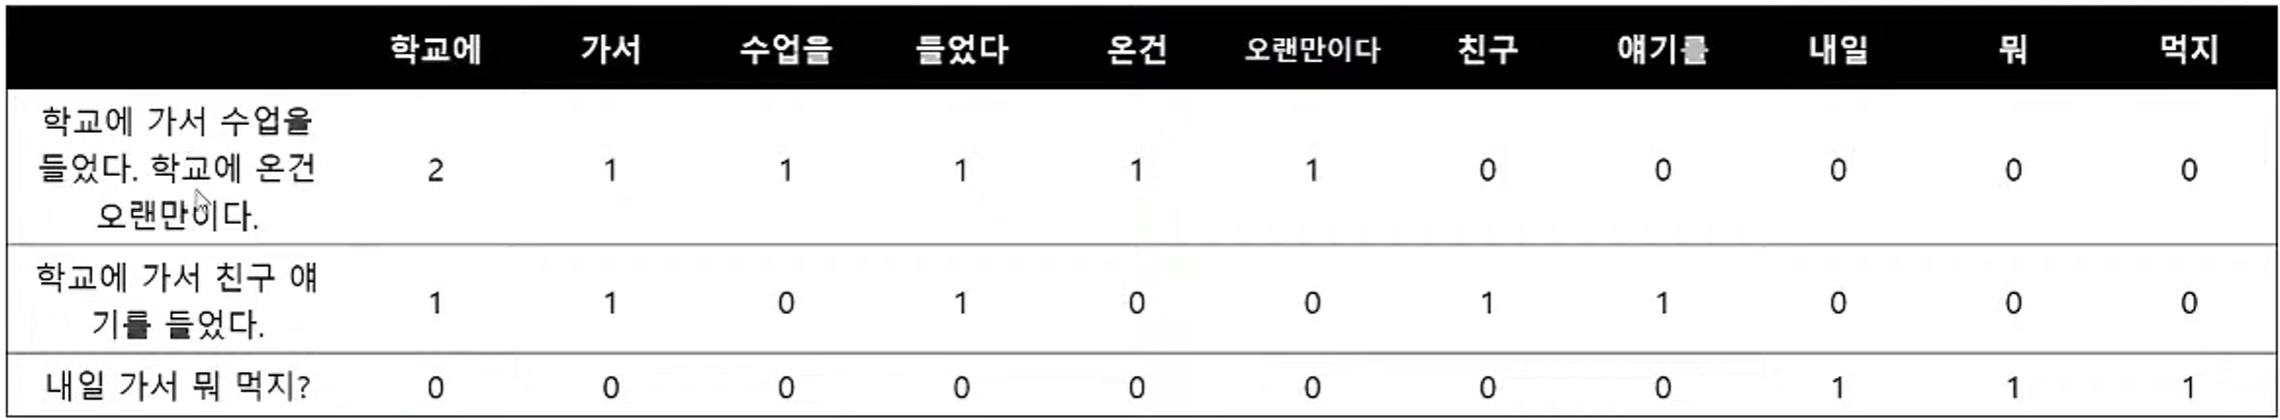
    1. 이 단어 사전은 미리 구축해 둬야 한다 (Tokenize) # 뛰어쓰기로 나눌 것인가(학교에), 형태소로 나눌 것인가(학교+에)아니면 다른방법?
    2. 문장 속 단어 빈도를 표시한다
### 장점
- 쉽고 직관적으로 문장을 숫자로 변환할 수 있다
    - 학교에 가서 친구 얘기를 들었다. -> [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
- 단어 빈도를 기반으로 문서 유사도를 쉽게 파악할 수 있다.
    - 숫자 분포를 통해 1번 문장은 3번 문장보다 2번 문장과 유사함을 알 수 있다.
    
### 단점
- 단어의 빈도만 고려할 뿐 순서를 고려하지 않는다.
    - 학교에 가서 친구 얘기를 들었다. -> [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0] -> [학교에, 가서, 들었다, 친구, 얘기를]
    - (단어의 빈도는 아는데 문장을 재구성 하지는 못한다.) 한국말에 치명적! ex) 좋다가 말았다, 좋다는건 아니다
    
- 세상의 모든 단어에 숫자를 붙여야 된다. 너무많아..
    - 단어 개수가 늘어나면 배열의 크기가 10만개~100만개로 엄처안게 커진다. 그러나 실제로 대부분의 값은 0이다.
    - [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0 , 0, 0, 0, 0, 0, 0, ...]

# Tokenize

## 오늘 저녁은 맛있었다

1. 뛰어쓰기 단위 -> [오늘, 저녁은, 맛있었다]
    - 명료하고 적용하기 쉽다.
    - '맛있다, 맛있어요, 맛있었다'가 모두 다르게 인식되며, 단어사전이 매우 커짐.
2. 문자 단위 -> [오, 늘, 저, 녁, 은, 맛, 있, 었, 다]
    - 각 token이 의미를 담지 못한다. eg)학교에 -> '학', '교', '에'   
3. Subword 단위 -> [오늘, 저녁, 은, 맛있, 었, 다]
    - 3.1. 형태소로 나누기: 매우 효율적이지만 언어 지식이 필요함(컴퓨터가 알아서 할 수 없음)
        - eg) '학교에' -> '학교' + '에'
    - 3.2. BPE(byte-pair encoding): 전체 문서를 문자 단위로 쪼갠 뒤 빈번하게 나오는 문자들을 묶어 단어사전의 수를 줄임.
        - eg) '학', '교' 로 따로 쓰이는 것보다 '학교' 붙여 쓴 게 많으면 후자를 단어사전에 채택

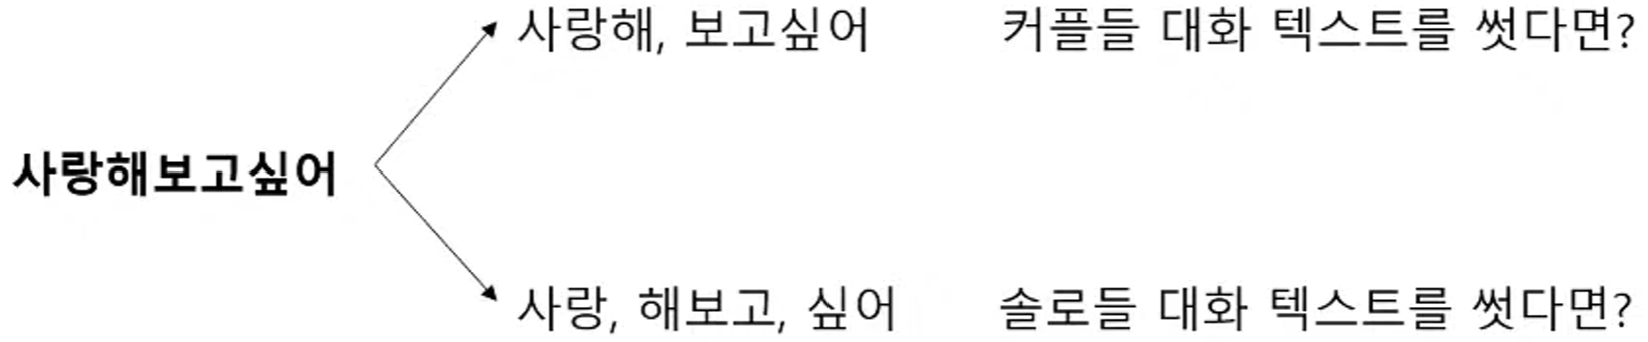
- Subword tokenizer도 학습해야 하며, `학습한 텍스트 데이터셋에 따라 결과가 다르다.`
    - 뛰어쓰기나 문자단위 tokenizer는 학습할 필요가 없음.
    - tokenizer 학습은 인공지능 모델의 학습과는 별도로 이루어짐.
- 모든 언어처리 과정은 tokenizer로 부터 시작한다.
- Tokenizer가 좋아야 embedding을 잘 시킬 수 있고, embedding이 잘되면 모델의 성능이 좋아진다.

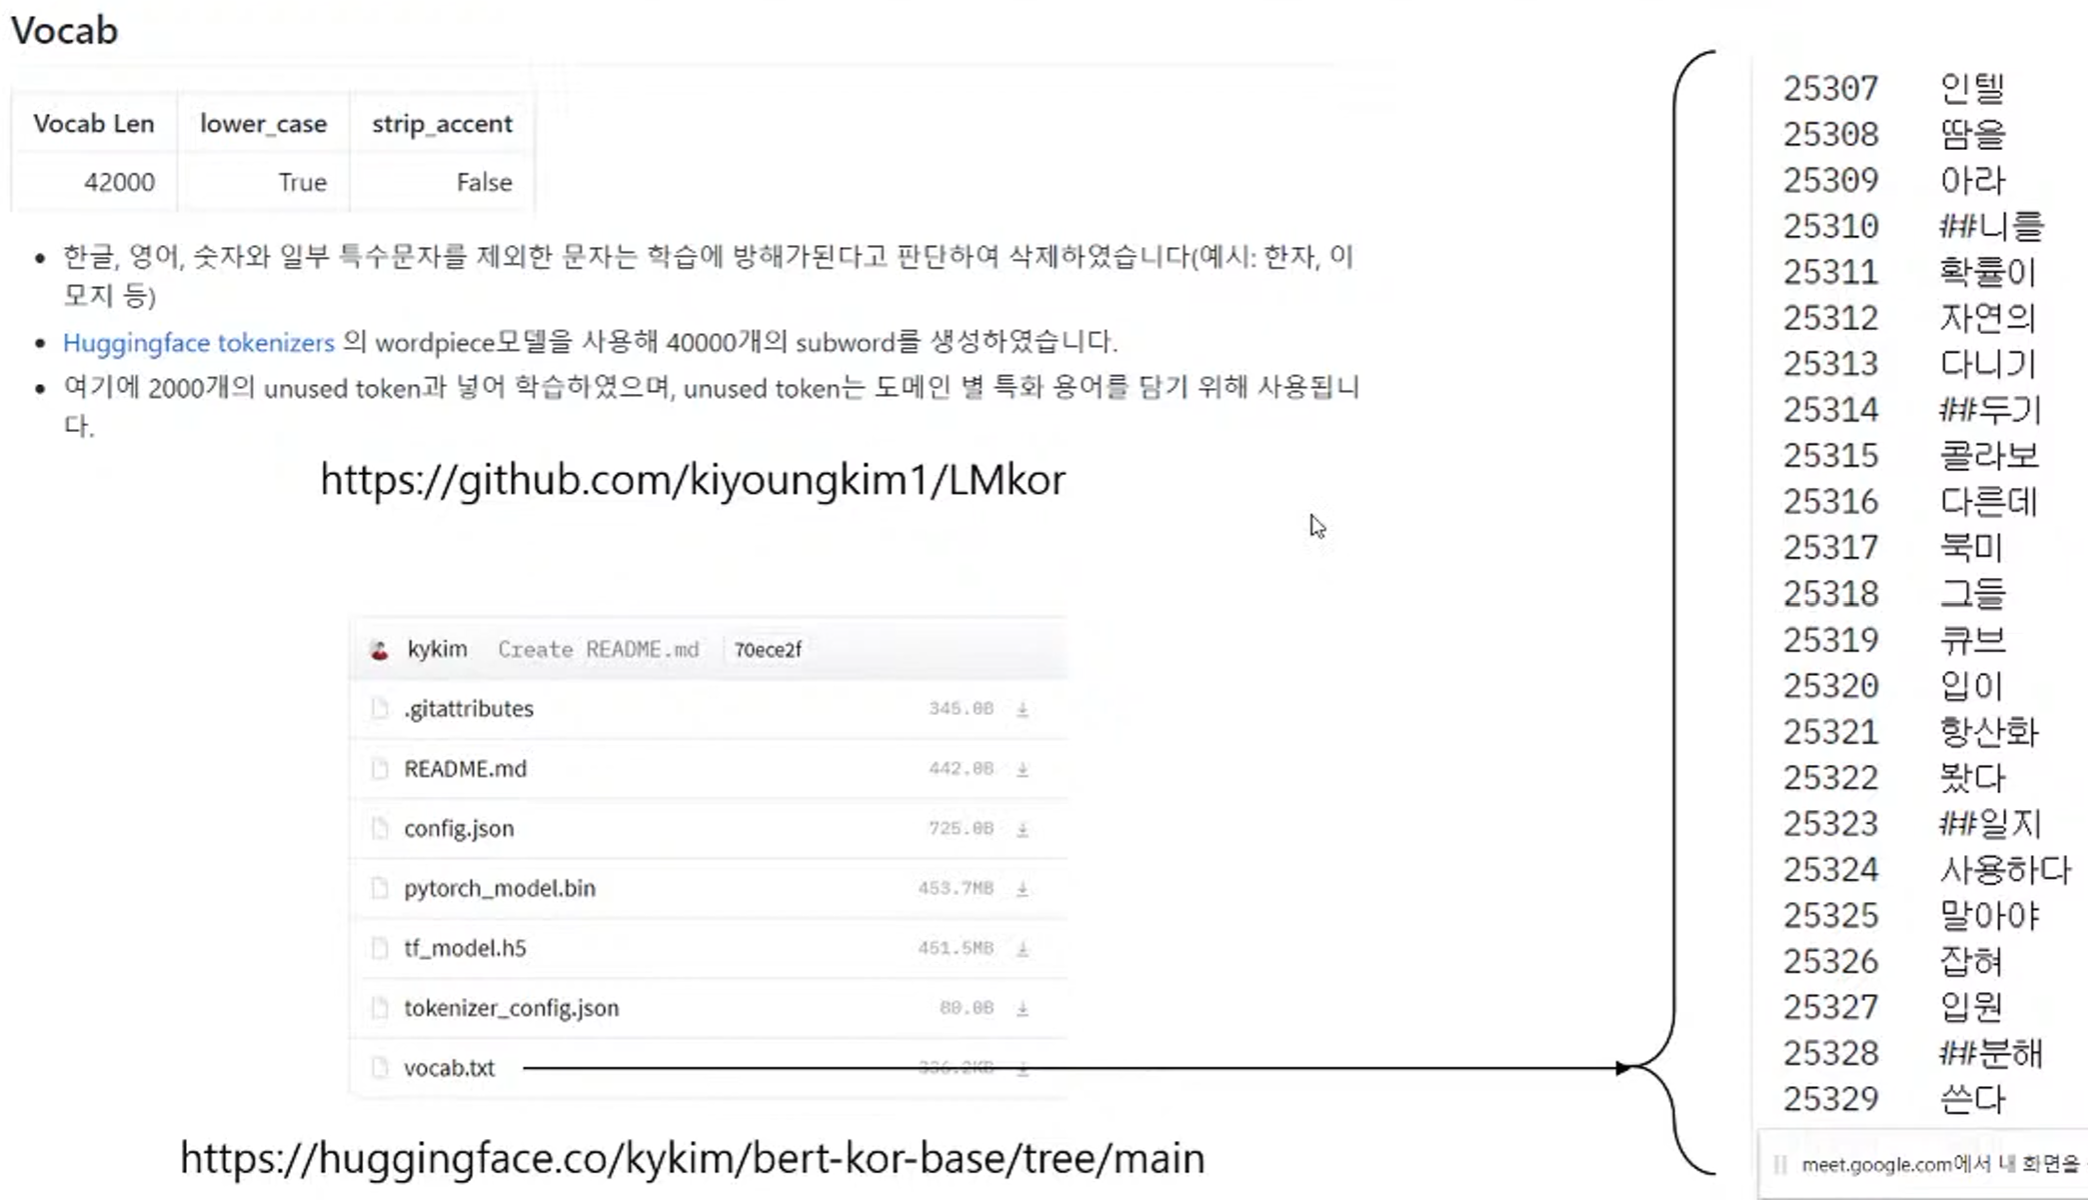

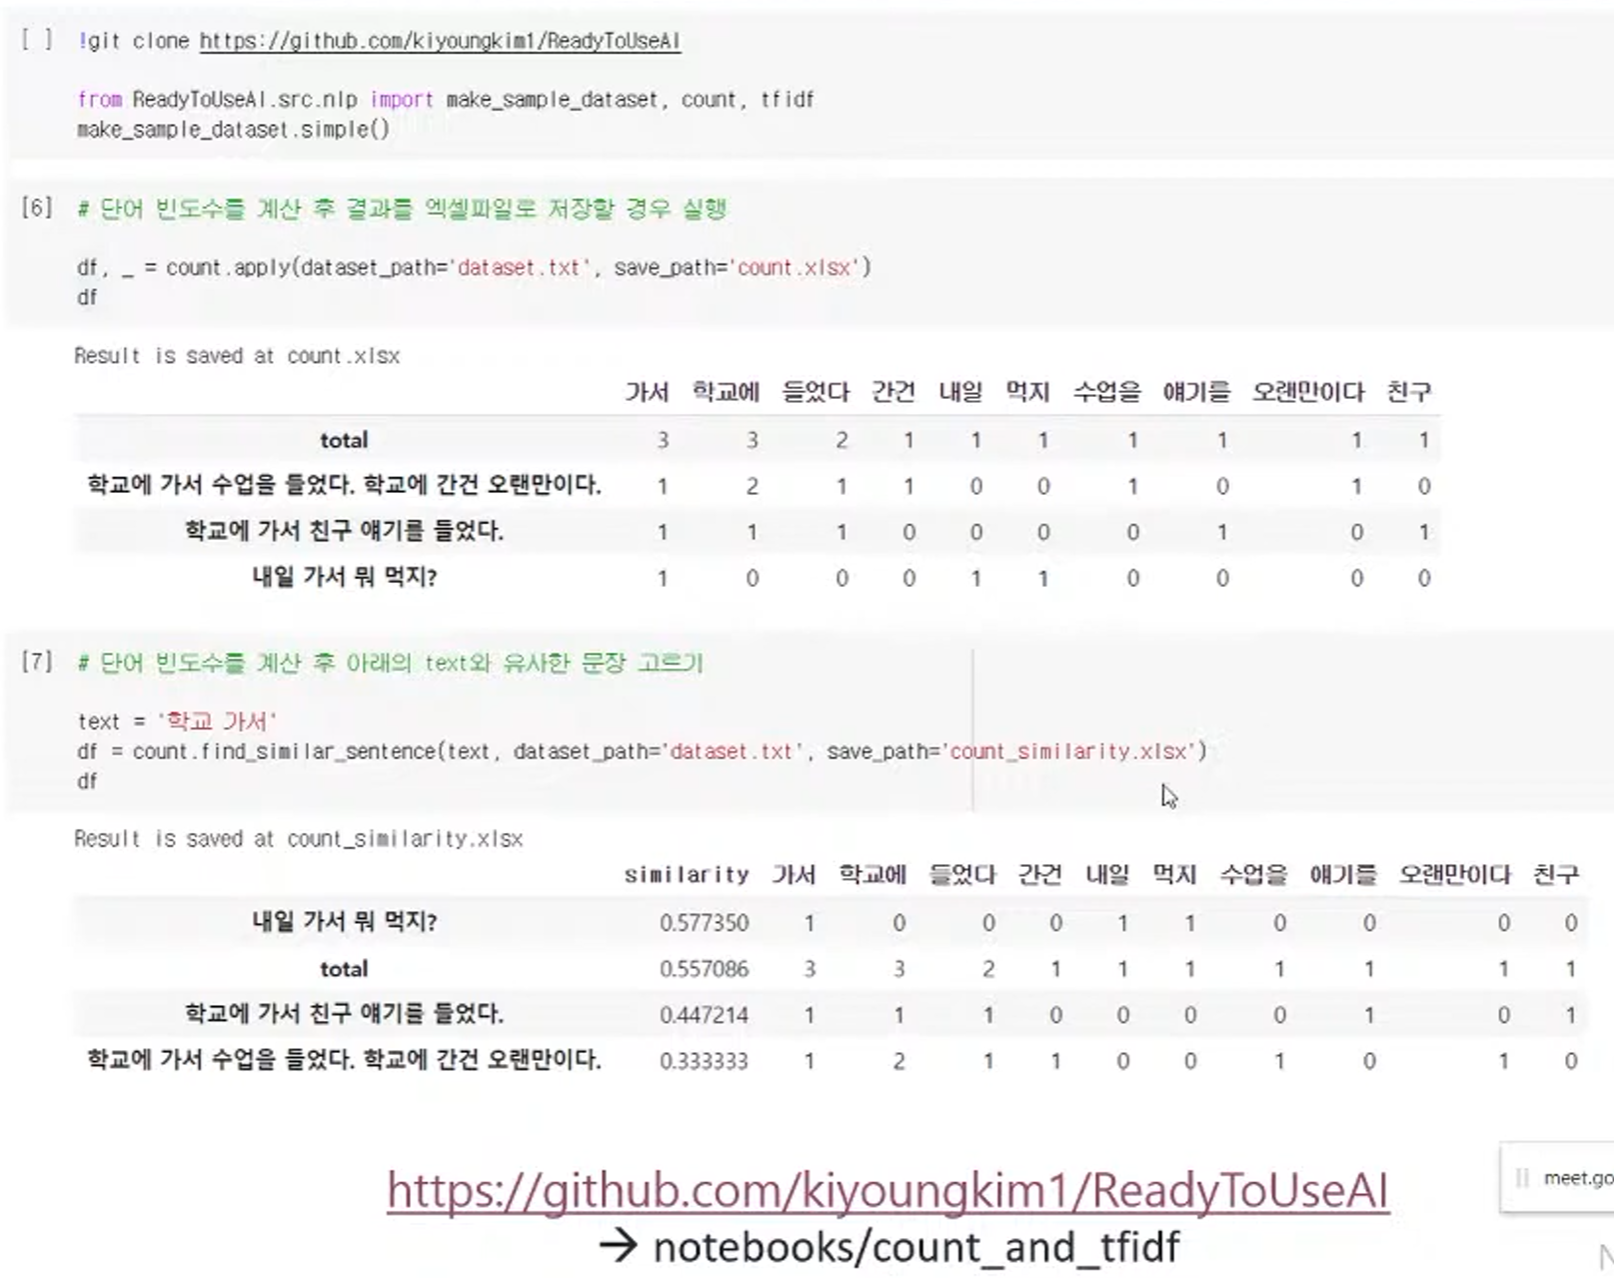

- TFIDF(Term Frequency-Inverse Document Frequency)
    - 오늘은 기분이 좋다 -> 오늘, `은`, 기분, `이`, 좋, 다
    - 내일은 수업이 없다 -> 내일, `은`, 수업, `이`, 없, 다
    - 기분이 최고        -> 기분, `이`, 최고
    
* 빈번하게 나타나는 단어지만 문장의 특징을 나타내지 않는 단어(a, the, 조사 등)의 가중치를 낮출 순 없을까?
* 단어가 나온 문장의 수로 나눠주자!
* 다른 문장에는 자주 안 나오는데 특정 문장에서 빈번하게 등장하는 단어 -> 키워드(중요한 단어)
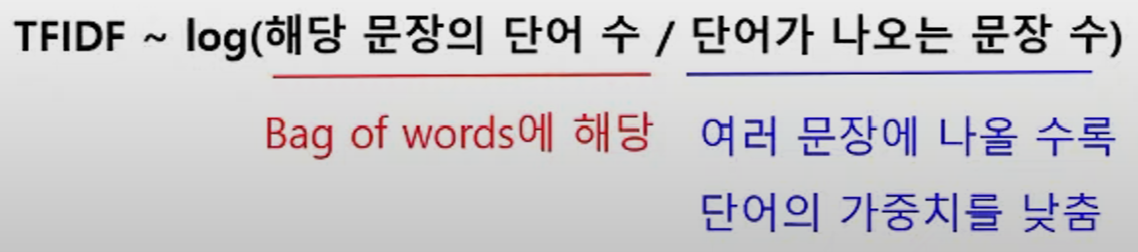


- `Term frequency`(원래 bag of words): 숫자 배열은 문장 내 단어의 `빈도수`
- `TFIDF` (업그레이드 된 bag of words): 숫자 배열은 문장 내 단어의 `중요도`
### => 언어 처리를 할 때 가장 먼저 빠르게 결과를 볼 수 있는 방법

- 단어의 빈도만 고려할 뿐 순서를 고려하지 않는다.
    - 학교에 가서 친구 얘기를 들었다. -> [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0] -> [학교에, 가서, 들었다, 친구, 얘기를]
    - (단어의 빈도는 아는데 문장을 재구성 하지는 못한다.) 한국말에 치명적! ex) 좋다가 말았다, 좋다는건 아니다
    
- 세상의 모든 단어에 숫자를 붙여야 된다. 너무많아..
    - 단어 개수가 늘어나면 배열의 크기가 10만개~100만개로 엄처안게 커진다. 그러나 실제로 대부분의 값은 0이다.
    - [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0 , 0, 0, 0, 0, 0, 0, ...]
### => 단점을 극복하기 위해 순서를 고려하여 주변 맥락으로 단어를 표현해 보자